In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [30]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
customer_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [39]:
customer_data['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_2476\3397677082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_2476\3397677082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_da

In [8]:
customer_data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [54]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
customer_data[features] = scaler.fit_transform(customer_data[features])

# Implementing K-means Clustring

In [40]:
kmean = KMeans(n_clusters=5, random_state=42)
kmean.fit(customer_data)
labels = kmean.labels_

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


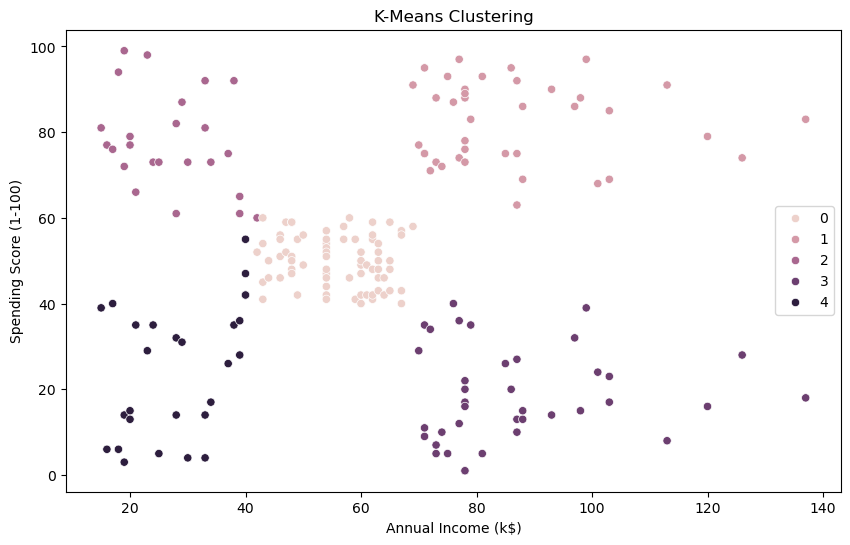

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data.iloc[:, 3], y=customer_data.iloc[:, 4], hue=labels)
plt.xlabel(customer_data.columns[3])
plt.xlabel(customer_data.columns[3])
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Optimal Number of Clusters: Elbow Method and Silhouette Score

In [42]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\Documents\100_days_of_bytewise\Day

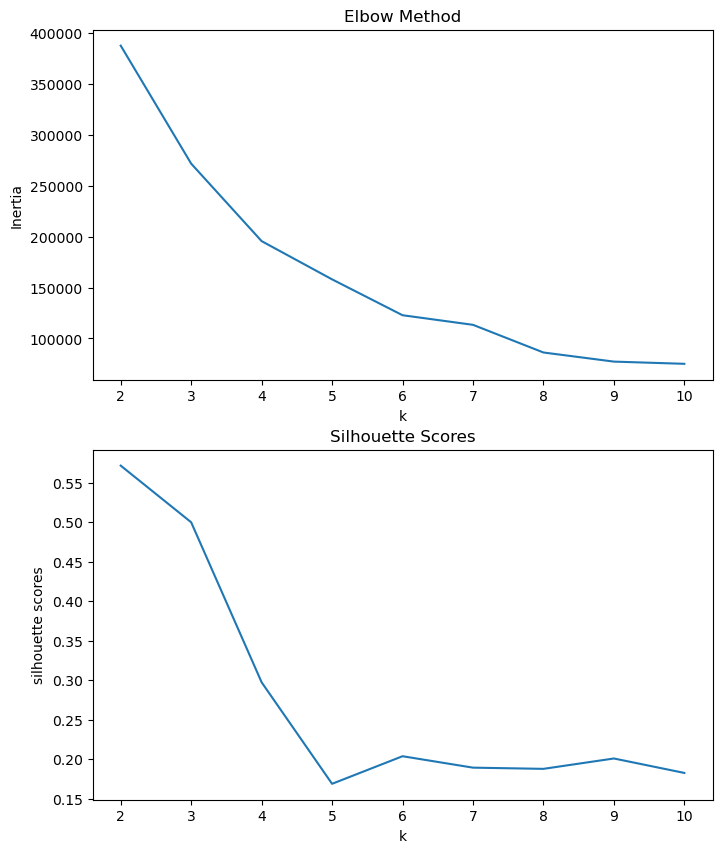

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes = axes.flatten()
axes[0].plot(k_range, inertias)
axes[0].set_title('Elbow Method')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Inertia')
axes[1].plot(k_range, silhouette_scores)
axes[1].set_title('Silhouette Scores')
axes[1].set_xlabel('k')
axes[1].set_ylabel('silhouette scores')

plt.show()

# Cluster Profiling and Insights

In [44]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(customer_data[['Annual Income (k$)', 'Spending Score (1-100)']])
customer_data['clusters'] = kmeans.labels_

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
cluster_profile = customer_data.groupby('clusters').agg({
    'Annual Income (k$)': ['mean', 'min', 'max', 'count'], 'Spending Score (1-100)': ['mean', 'min', 'max']
}).reset_index()

cluster_profile.columns = ['Cluster', 'Income Mean', 'Income Min', 'Income Max', 'Count', 'Spending Score Mean', 'Spending Score Min', 'Spending Score Max']
     

In [46]:
print(cluster_profile)

   Cluster  Income Mean  Income Min  Income Max  Count  Spending Score Mean  \
0        0    55.296296          39          76     81            49.518519   
1        1    86.538462          69         137     39            82.128205   
2        2    25.727273          15          39     22            79.363636   
3        3    88.200000          70         137     35            17.114286   
4        4    26.304348          15          39     23            20.913043   

   Spending Score Min  Spending Score Max  
0                  34                  61  
1                  63                  97  
2                  61                  99  
3                   1                  39  
4                   3                  40  


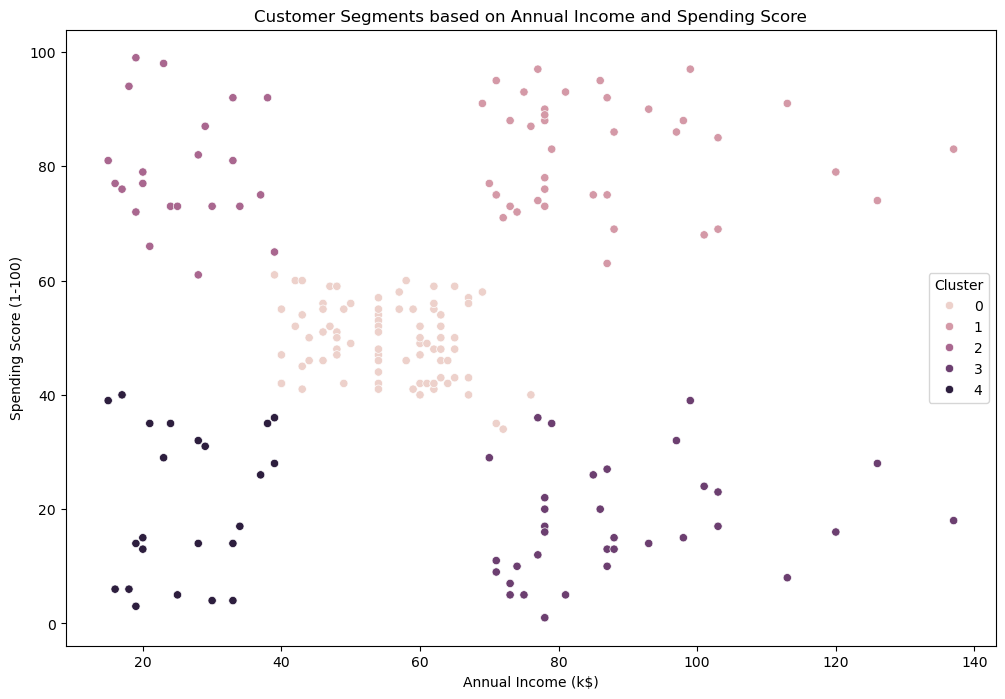

In [47]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='clusters', data=customer_data)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Hierarchical Clustering for Customer Segmentation

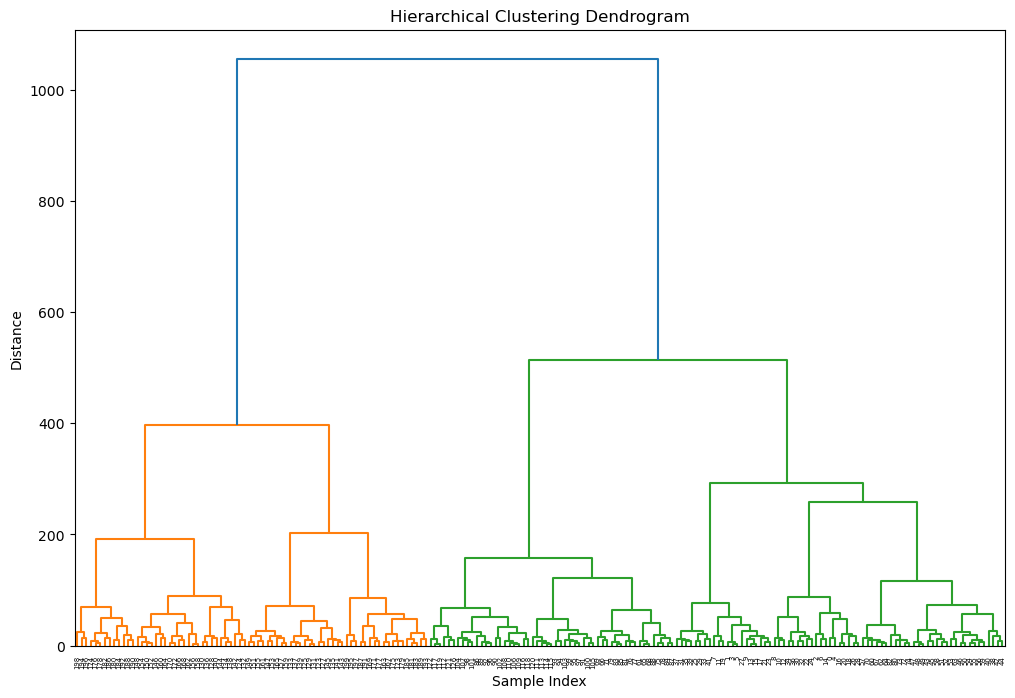

In [48]:

linkage_matrix = linkage(customer_data, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [51]:
max_d = 5 
clusters_hierarchical = fcluster(linkage_matrix, max_d, criterion='maxclust')

customer_data['cluster_hierarchical'] = clusters_hierarchical

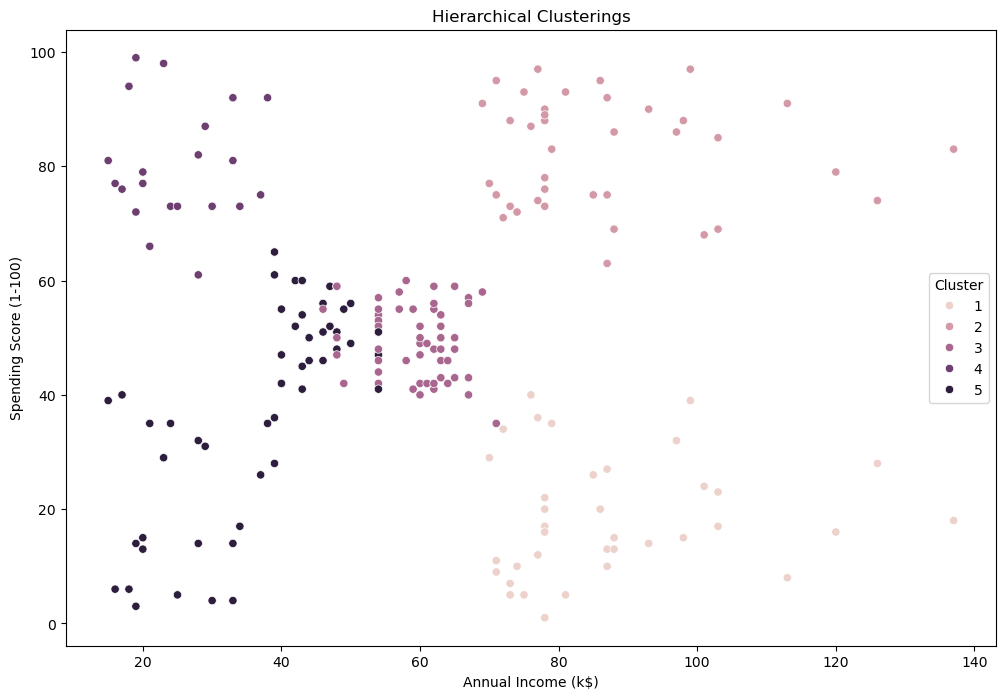

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=customer_data['Annual Income (k$)'], y=customer_data['Spending Score (1-100)'], hue='cluster_hierarchical', data=customer_data)
plt.title('Hierarchical Clusterings')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Visualizing Clusters with PCA

In [56]:
linkage_matrix = linkage(customer_data[features], method='ward')
clusters_hierarchical = fcluster(linkage_matrix, 5, criterion='maxclust')

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(customer_data[features])
clusters_kmeans = kmeans.labels_

customer_data['cluster_hierarchical'] = clusters_hierarchical
customer_data['cluster_kmeans'] = clusters_kmeans

C:\Users\PC\Documents\100_days_of_bytewise\Day_14\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(customer_data[features])

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=features_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster_hierarchical'] = clusters_hierarchical
pca_df['cluster_kmeans'] = clusters_kmeans
     

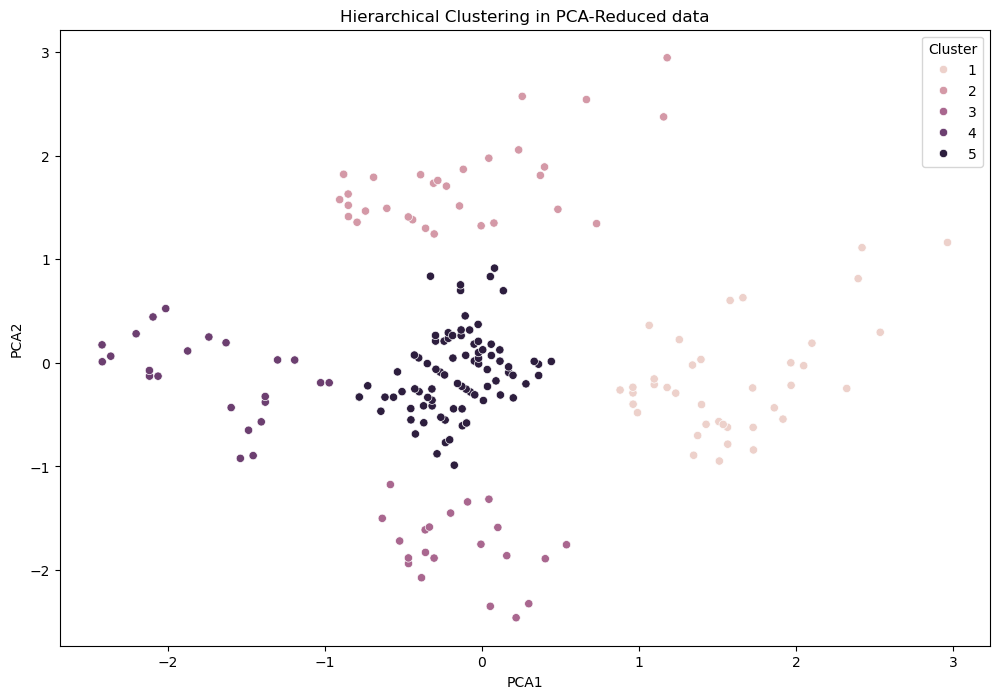

In [59]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_hierarchical', data=pca_df)
plt.title('Hierarchical Clustering in PCA-Reduced data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

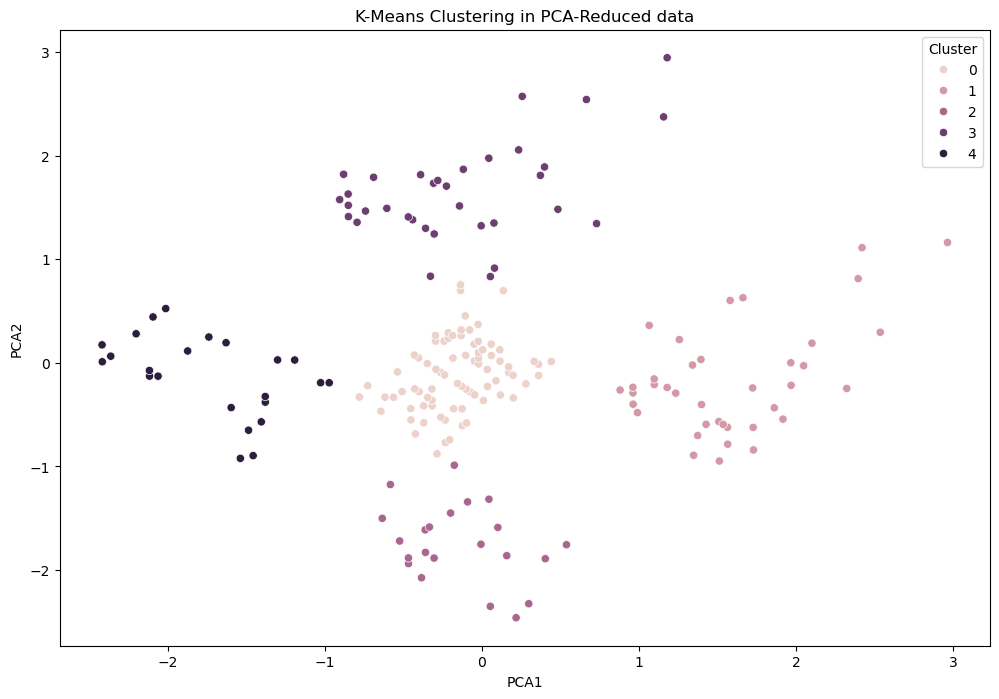

In [60]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster_kmeans', data=pca_df)
plt.title('K-Means Clustering in PCA-Reduced data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()